# **Lateral Boundary Diffusion idealized test cases**

This notebook shows results from idealized tests cases where only neutral diffusion and/or lateral diffusion are acting (i.e., dynamics and vertical diffusion are turned off). 

## Model setup 

### Domain, boundary conditions and grid resolution
The horizontal extent of the domain is 200 x 200 km with a constant horizontal grid spacing in both zonal ($x$) and meridional ($y$) directions ($\Delta x$ = $\Delta y$ = 100 km). The east and west boundaries are closed and the north and south boundaries are pediodic. The ocean bottom is flat and 500 m deep. Two different vertical coordiate systems are used: $Z*$ and a hybrid between Z* near the surface and isopycnal below. The total number of grid poins in the vertical is 80, regardless the choise of vertical coordinate. A constant vertical grid spacing ($\Delta z$ = 10 m) is imposed when using Z*. When using a hybrid coordinate $\Delta z$ = 10 m in the upper 100 m of the ocean and below that 40 isopycnal are imposed (provide additional info).  

### Initial conditions and equation of state
The ocean salinity ($S$) is set to 35 psu everywhere. The initial potential temperature ($\theta$) varies linearly with depth $\partial_z \theta$ = -3 $\times$ 10$^{-2}$ $^o$C m$^{-1}$. At x = 0 km, $\theta(z=0)$ = 20 $^o$C and  $\theta(z=400)$ = 5 $^o$C. A zonal gradient in $\theta$ is imposed throughout the entire water column following $\partial_x \theta$ = 5 $\times$ 10$^{-3}$ $^o$C km$^{-1}$ (i.e., $\theta$ is 1$^o$C colder at x = 200 km).  
 
A linear equation of state is used following

$\rho = \rho_0 + (\partial_\theta \rho \times \theta) + (\partial_S \rho \times S)$,

where $\rho_0$ = 1000 kg m$^{-3}$ is the density when $\theta$ = 0 and S = 0 psu, $\partial_\theta \rho$ = -0.255 kg m$^{-3}$ $^o$C$^{-1}$ is the partial derivative of density with respect to potential temperatue and $\partial_S \rho$ =  0.764 kg m$^{-3}$ psu$^{-1}$ is the partial derivative of density with respect to salinity. Since $\rho$ does not depend on either pressure or the geographic location, the concept of neutral density does not apply here __elaborate here__. Figure 1a shows the initial $\theta$ with corresponding isopycnals. 

<figure>
 <img  src="initial_conditions.png" alt="Figure 1" />
 <figcaption>
     
 Figure 1: Initial conditions. a) colors show potentail temperature ($\theta$, $^o$C) and white contours show isopycnals every 5 kg m$^{-3}$; b) passive tracer #1 ()
 </figcaption>
</figure>

To isolate the effects of neutral diffusion from those due to lateral diffusion two passive tracers ($\tau_1$ and $\tau_2$) are used with concentrations ranging from 0 to 1. For $\tau_1$ only a vertical gradient is imposed such that $\tau_1(z=0)$ = 0 while $\tau_1(z=400)$ = 1.0. For $\tau_2$ only a horizontal gradient is imposed where $\tau_2(x=0)$ = 0 km while $\tau_2(x=200)$ = 1.0


KHTR = 500 m$^2$ s$^{-1}$

In [1]:
from mom6_tools.m6plot import ztplot
from mom6_tools.MOM6grid import MOM6grid
from IPython.display import display, Markdown, Latex
from mom6_tools.m6plot import xycompare, xyplot, setFigureSize, chooseColorLevels, \
                       createYZlabels, myStats, yzWeight, boundaryStats, label
from mom6_tools.m6toolbox import section2quadmesh
import xarray as xr
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import warnings
from misc import yzplot
warnings.filterwarnings("ignore")
%matplotlib inline

Basemap module not found. Some regional plots may not function properly


In [2]:
path = '/glade/scratch/gmarques/LBD/'
grd = MOM6grid(path+'case2/LBD-H/static.nc')

MOM6 grid successfully loaded... 



In [3]:
IC_Z = xr.open_dataset(path+'case2/LBD-Z/MOM_IC.nc')

In [4]:
x1 = np.linspace(0,200,len(grd.xh))
lon = np.linspace(0,200,len(grd.xh)+1)

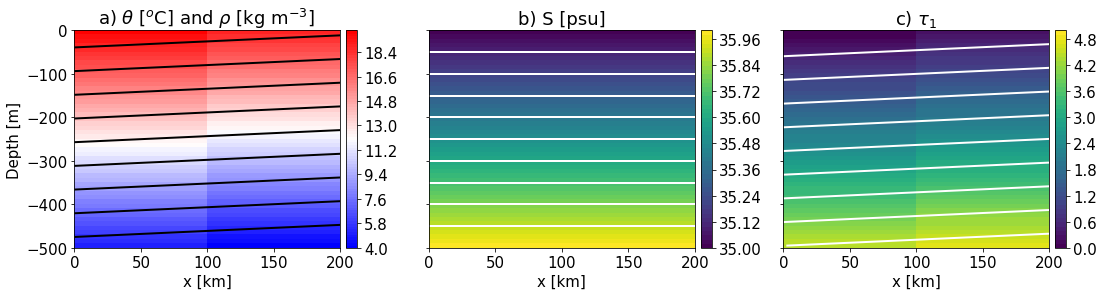

In [5]:
%matplotlib inline
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,4), sharey=True)
temp = np.ma.masked_invalid(IC_Z.Temp[0,:,0,:].values) 
salt = np.ma.masked_invalid(IC_Z.Salt[0,:,0,:].values) 
rho = -0.255*temp + 0.764*salt
tr1 = np.ma.masked_invalid(IC_Z.tr1[0,:,0,:].values) 
tr2 = np.ma.masked_invalid(IC_Z.tr2[0,:,0,:].values) 
eta = IC_Z.eta[0,:,0,:].values 
z1 = 0.5 * (eta[0:-1,1]+eta[1::,1]) 
z2 = 0.5 * (eta[0:-1,:]+eta[1::,:]) 

[X1,Z1] = np.meshgrid(x1,z1)

# a
yzplot(temp, grd.geolon_c[0,:], eta, nbins=100, centerlabels=True, clim=(4., 20.0), 
       show_stats=0, axis=ax[0], colormap=plt.cm.bwr)
ax[0].set_ylabel('Depth [m]') 
ax[0].set_xlabel('x [km]') 
ax[0].set_title(r'a) $\theta$ [$^o$C] and $\rho$ [kg m$^{-3}$] ')
ax[0].contour(X1,z2,rho, levels=np.arange(0,100, 0.5), colors='k', linewidths=2)

#b
yzplot(salt, grd.geolon_c[0,:], eta, nbins=50, colormap=plt.cm.viridis, centerlabels=True, 
       clim=(35., 36.), show_stats=0, axis=ax[1])
ax[1].set_ylabel('') 
ax[1].set_xlabel('x [km]') 
ax[1].set_title(r'b) S [psu]')
ax[1].contour(X1,z2,salt, levels=np.arange(35,36, 0.1), colors='w', linewidths=2)

#c
yzplot(tr2, grd.geolon_c[0,:], eta, nbins=50, colormap=plt.cm.viridis, centerlabels=True, 
       clim=(0., 5.), show_stats=0, axis=ax[2])
ax[2].set_ylabel('') 
ax[2].set_xlabel('x [km]') 
ax[2].set_title(r'c) $\tau_1$')
ax[2].contour(X1,z2,tr2, levels=np.arange(0,5, 0.5), colors='w', linewidths=2)

plt.savefig('initial_conditions.png',bbox_inches='tight')

In [6]:
z = 0.5 * (eta[0:-1,:]+eta[1::,:]) 

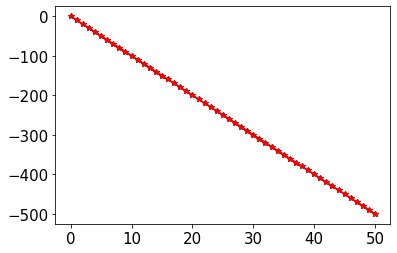

In [7]:
plt.plot(eta[:,0],'k*-')
plt.plot(eta[:,1],'r*-')

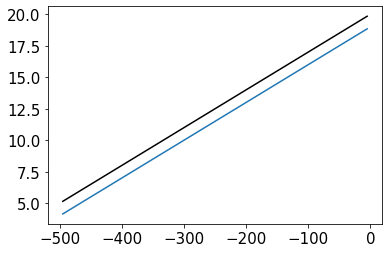

In [8]:
plt.plot(z[:,0],temp[:,0],'k')
plt.plot(z[:,1],temp[:,1])

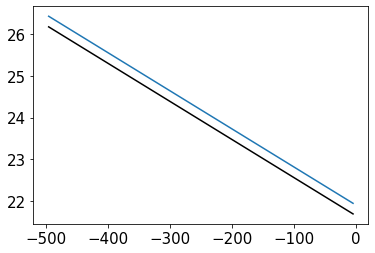

In [9]:
plt.plot(z[:,0],rho[:,0],'k')
plt.plot(z[:,1],rho[:,1])

In [10]:
#IC_Z = xr.open_dataset(path+'case1/LBD-Z/MOM_IC.nc')
IC_H = xr.open_dataset(path+'case2/LBD-H/MOM_IC.nc')

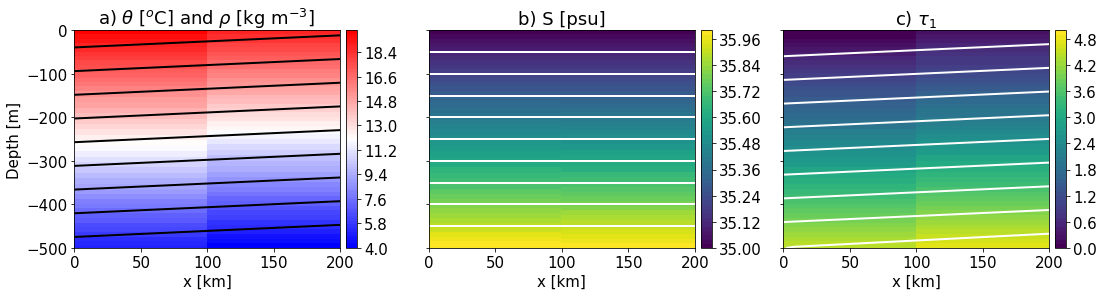

In [11]:
%matplotlib inline

plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,4), sharey=True)
temp = np.ma.masked_invalid(IC_H.Temp[0,:,0,:].values) 
salt = np.ma.masked_invalid(IC_H.Salt[0,:,0,:].values) 
rho = -0.255*temp + 0.764*salt
tr1 = np.ma.masked_invalid(IC_H.tr1[0,:,0,:].values) 
tr2 = np.ma.masked_invalid(IC_H.tr2[0,:,0,:].values) 
eta = IC_H.eta[0,:,0,:].values 
h = IC_H.h[0,:,0,:].values 

z1 = 0.5 * (eta[0:-1,1]+eta[1::,1]) 
z2 = 0.5 * (eta[0:-1,:]+eta[1::,:]) 

[X1,Z1] = np.meshgrid(x1,z1)
# a
yzplot(temp, grd.geolon_c[0,:], eta, nbins=100, centerlabels=True, clim=(4., 20.0), 
       show_stats=0, axis=ax[0], colormap=plt.cm.bwr)
ax[0].set_ylabel('Depth [m]') 
ax[0].set_xlabel('x [km]') 
ax[0].set_title(r'a) $\theta$ [$^o$C] and $\rho$ [kg m$^{-3}$] ')
ax[0].contour(X1,z2,rho, levels=np.arange(0,100, 0.5), colors='k', linewidths=2)

#b
yzplot(salt, grd.geolon_c[0,:], eta, nbins=50, colormap=plt.cm.viridis, centerlabels=True, 
       clim=(35., 36.), show_stats=0, axis=ax[1])
ax[1].set_ylabel('') 
ax[1].set_xlabel('x [km]') 
ax[1].set_title(r'b) S [psu]')
ax[1].contour(X1,z2,salt, levels=np.arange(35,36, 0.1), colors='w', linewidths=2)

#c
yzplot(tr2, grd.geolon_c[0,:], eta, nbins=50, colormap=plt.cm.viridis, centerlabels=True, 
       clim=(0., 5.), show_stats=0, axis=ax[2])
ax[2].set_ylabel('') 
ax[2].set_xlabel('x [km]') 
ax[2].set_title(r'c) $\tau_1$')
ax[2].contour(X1,z2,tr2, levels=np.arange(0,5, 0.5), colors='w', linewidths=2)

plt.savefig('initial_conditions_hybrid.png',bbox_inches='tight')

In [12]:
z = 0.5 * (eta[0:-1,:]+eta[1::,:]) 

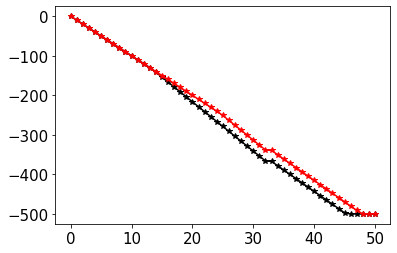

In [13]:
plt.plot(eta[:,0],'k*-')
plt.plot(eta[:,1],'r*-')

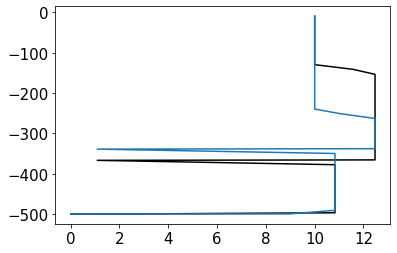

In [14]:
plt.plot(h[:,0], -h[:,0].cumsum(),'k')
plt.plot(h[:,1], -h[:,1].cumsum())

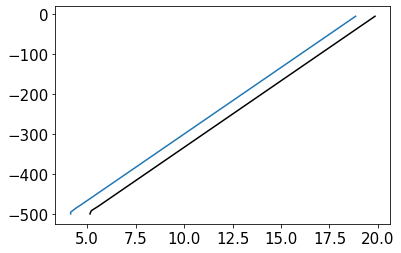

In [15]:
plt.plot(temp[:,0], z[:,0],'k')
plt.plot(temp[:,1],z[:,1])

In [16]:
def make_plot(case,grd,IC,BLD_L,BLD_R, n=0):
  %matplotlib inline  
  plt.rcParams.update({'font.size': 15})
  BLD = np.zeros(len(grd.geolon_c[0,:])+1)
  BLD[0:2]= BLD_L; BLD[2::] = BLD_R
  x_BLD = [grd.geolon_c[0,0], grd.geolon_c[0,1], grd.geolon_c[0,1], grd.geolon_c[0,2]]  
  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharex=True, sharey=True)
  ax1 = ax.flatten()
  rho = np.ma.masked_invalid(case.rhopot2[n,:,0].values) - 1000.
  lbd_tr1 = np.ma.masked_invalid(case.tr2_lbdxy_cont_tendency[n,:,0].values)
  Z = case.e[n,:,0].values 
  #Z = 0.5 * (eta[0:-1,1]+eta[1::,1])

  yzplot(lbd_tr1, grd.geolon_c[0,:], Z, nbins=100, colormap=plt.cm.bwr, centerlabels=True,clim=(-1.e-7, 1.e-7), show_stats=1,
         axis=ax1[0])
  ax1[0].set_ylabel('Depth [m]') 
  ax1[0].plot(x_BLD,BLD,'k--',linewidth=4)
  #for k in range(len(case.z_i)):
  #  ax1[0].plot([x_BLD[0],x_BLD[-1]],-np.ones(2)*case.z_i[k].values,'gray',linewidth=0.5)

  ax1[0].set_title(r'a) LBD $\tau_1$')
  ax1[0].contour(x1,-z1,rho, levels=np.arange(0,100, 0.5), colors='k', linewidths=0.5)

  lbd_tr2 = np.ma.masked_invalid(case.S_lbdxy_cont_tendency[n,:,0].values)
  yzplot(lbd_tr2, grd.geolon_c[0,:], Z, nbins=100, colormap=plt.cm.bwr, centerlabels=True,clim=(-1e-18, 1e-18),show_stats=1,
       title='b) LBD S', axis=ax1[1])
  ax1[1].plot(x_BLD,BLD,'k--',linewidth=4); ax1[1].set_ylabel('')
  ax1[1].set_title('b) LBD S')
  ax1[1].contour(x1,-z1,rho, levels=np.arange(0,100, 0.5), colors='k', linewidths=0.5)
               
  nd_tr1 = np.ma.masked_invalid(case.tr2_dfxy_cont_tendency[n,:,0].values)
  yzplot(nd_tr1, grd.geolon_c[0,:], Z, nbins=100, colormap=plt.cm.bwr, centerlabels=True,clim=(-1e-7, 1e-7), show_stats=1,
         title=r'c) ND $\tau_1$', axis=ax1[2])
  ax1[2].set_ylabel('Depth [m]'); ax1[2].set_xlabel('Longitude [$^o$E]')
  ax1[2].plot(x_BLD,BLD,'k--',linewidth=4)
  ax1[2].set_title(r'c) ND $\tau_1$')
  ax1[2].contour(x1,-z1,rho, levels=np.arange(0,100, 0.5), colors='k', linewidths=0.5)
               
  nd_tr2 = np.ma.masked_invalid(case.S_dfxy_cont_tendency[n,:,0].values)
  yzplot(nd_tr2, grd.geolon_c[0,:], Z, nbins=100, colormap=plt.cm.bwr, centerlabels=True,clim=(-1e-7, 1e-7), show_stats=1,
         axis=ax1[3])
  ax1[3].set_title('d) ND S')
  ax1[3].set_xlabel('Longitude [$^o$E]')
  ax1[3].set_ylabel('')
  ax1[3].plot(x_BLD,BLD,'k--',linewidth=4)
  ax1[3].contour(x1,-z1,rho, levels=np.arange(0,100, 0.5), colors='k', linewidths=0.5)

  # plot difference
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 4), sharex=True, sharey=True)
  ax1 = ax.flatten()
  
  # temp
  temp = np.ma.masked_invalid((case.temp[-1,:,0].values-IC.Temp[0,:,0,:].values))
  yzplot(temp, grd.geolon_c[0,:], Z, nbins=100, colormap=plt.cm.bwr,  show_stats=1,
         axis=ax1[0])
  ax1[0].set_ylabel('Depth [m]') 
  ax1[0].set_xlabel('Longitude [$^o$E]')
  ax1[0].plot(x_BLD,BLD,'k--',linewidth=4)
  ax1[0].set_title(r'a) $\Delta \theta$ [$^o$C]',fontsize=15)

  # tr1
  tr1 = np.ma.masked_invalid((case.salt[-1,:,0].values-IC.Salt[0,:,0,:].values))
  yzplot(tr1, grd.geolon_c[0,:], Z, nbins=100, colormap=plt.cm.bwr,  show_stats=1,
         axis=ax1[1])
  ax1[1].set_ylabel(''); ax1[1].set_xlabel('') 
  ax1[1].plot(x_BLD,BLD,'k--',linewidth=4)
  ax1[1].set_title(r'b) $\Delta S$ [psu]',fontsize=15)
    
  # tr2
  tr2 = np.ma.masked_invalid((case.tr2[-1,:,0].values-IC.tr2[0,:,0,:].values))
  yzplot(tr2, grd.geolon_c[0,:], Z, nbins=100, colormap=plt.cm.bwr,  show_stats=1,
         axis=ax1[2])
  ax1[2].set_ylabel(''); ax1[2].set_xlabel('') 
  ax1[2].plot(x_BLD,BLD,'k--',linewidth=4)
  ax1[2].set_title(r'c) $\Delta \tau_2$ [kg kg$^{-1}$]',fontsize=15)

  return

In [17]:
def make_plot_all(case1,case2,grd,BLD_L,BLD_R, var1='tr2_lbdxy_cont_tendency', 
                  var2='tr2_dfxy_cont_tendency', clim=(-2.3e-7, 2.3e-7), tr=r'$\theta$', 
                  fname='', units='[kg m-2 s-1]'):
  %matplotlib inline
  n = 0
  plt.rcParams.update({'font.size': 15})
  BLD = np.zeros(len(grd.geolon_c[0,:])+1)
  BLD[0:2]= BLD_L; BLD[2::] = BLD_R
  x_BLD = [grd.geolon_c[0,0], grd.geolon_c[0,1], grd.geolon_c[0,1], grd.geolon_c[0,2]]  
  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 12), sharex=True, sharey=True)
  ax1 = ax.flatten()
  eta1 = case1.e[n,:,0,:].values 
  eta2 = case2.e[n,:,0,:].values  
  Z1 = case1.e[n,:,0].values  
  x1 = np.linspace(0,200,len(grd.xh))
  zh = 0.5 * (Z1[0:-1,1]+Z1[1::,1]) 

  [X1,Z2] = np.meshgrid(x1,zh)
    
  rho1 = np.ma.masked_invalid(case1.rhopot2[n,:,0].values) - 1000.
  nd1 = np.ma.masked_invalid(case1[var2][n,:,0].values)
  yzplot(nd1, grd.geolon_c[0,:], Z1, nbins=100, colormap=plt.cm.bwr, centerlabels=True,clim=clim, show_stats=1,
         axis=ax1[0], cbar=False)
  ax1[0].set_ylabel('Depth [m]') 
  ax1[0].plot(x_BLD,BLD,'k--',linewidth=4)
  ax1[0].set_title('a) Z* (neutral)')
  ax1[0].set_xlabel(''); ax1[1].set_ylabel('Depth [m]')
  ax1[0].contour(X1,Z2,rho1, levels=np.arange(0,100, 0.5), colors='k', linewidths=0.5)

  lbd1 = np.ma.masked_invalid(case1[var1][n,:,0].values)
  yzplot(lbd1, grd.geolon_c[0,:], Z1, nbins=100, colormap=plt.cm.bwr, centerlabels=True,clim=clim,show_stats=1,
        axis=ax1[1], cbar=False)
  ax1[1].plot(x_BLD,BLD,'k--',linewidth=4); ax1[1].set_ylabel('')
  ax1[1].set_title('b) Z* (lateral)')
  ax1[1].set_xlabel(''); ax1[1].set_ylabel('')
  ax1[1].contour(X1,Z2,rho1, levels=np.arange(0,100, 0.5), colors='k', linewidths=0.5)
  
  Z1 = case2.e[n,:,0].values  
  zh = 0.5 * (Z1[0:-1,1]+Z1[1::,1]) 

  [X1,Z2] = np.meshgrid(x1,zh)
  zhh = 0.5 * (eta2[0:-1,:]+eta2[1::,:])
  print(X1.shape,zhh.shape)
  rho2 = np.ma.masked_invalid(case2.rhopot2[n,:,0].values) - 1000.
  nd2 = np.ma.masked_invalid(case2[var2][n,:,0].values)
  im = yzplot(nd2, grd.geolon_c[0,:], eta2, nbins=100, colormap=plt.cm.bwr, centerlabels=True,clim=clim, show_stats=1,
         axis=ax1[2], cbar=False)
  ax1[2].set_xlabel('x [km]'); ax1[2].set_ylabel('Depth [m]')
  ax1[2].plot(x_BLD,BLD,'k--',linewidth=4)
  ax1[2].set_title('c) HYCOM1 (neutral)')
  ax1[2].contour(X1,zhh,rho2, levels=np.arange(0,100, 0.5), colors='k', linewidths=0.5)

  lbd2 = np.ma.masked_invalid(case2[var1][n,:,0].values)
  im = yzplot(lbd2, grd.geolon_c[0,:], eta2, nbins=100, colormap=plt.cm.bwr, centerlabels=True, clim=clim, show_stats=1,
         axis=ax1[3], cbar=False)
  ax1[3].set_xlabel('x [km]'); ax1[3].set_ylabel('')
  ax1[3].plot(x_BLD,BLD,'k--',linewidth=4)
  ax1[3].set_title('d) HYCOM1 (lateral)')
  ax1[3].contour(X1,zhh,rho2, levels=np.arange(0,100, 0.5), colors='k', linewidths=0.5)
   
  fig.subplots_adjust(bottom=0.125)
  cbar_ax = fig.add_axes([0.17, 0.01, 0.7, 0.05])
  cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
  cbar.ax.set_title(tr+' tendency ' + units)
  if fname:
    plt.savefig(fname,bbox_inches='tight')

  return

## Tracer tendencies: neutral diffusion only (CTRL) and lateral boundary + neutral diffusion (LBD)

### Case2

HBL(left) = 100; HBL(right) = 300


| Experiment | Vertical coordinate |  BLD left (m) | BLD right (m) | LBD method | Linear transition |
|------------|:-------------------:|:-------------:|:-------------:|:----------:| :----------:      |
| LBD-z*    |          Z*         |      100      |      300      |    layer    |  true             |
| LBD-H     |          HYCOM1     |      100      |      300      |    layer    |  true            |

In [18]:
case2_lbd_z = xr.open_dataset(path+'case2/LBD-Z/prog.nc')

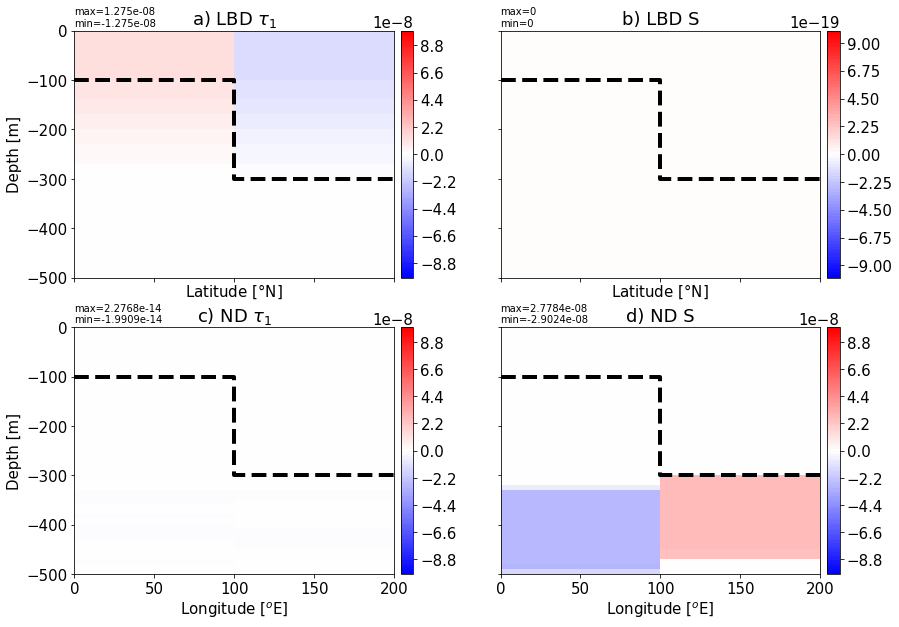

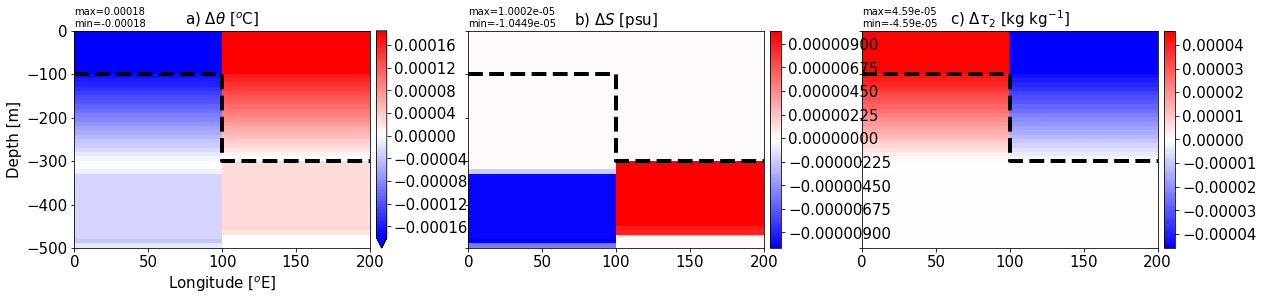

In [19]:
make_plot(case2_lbd_z,grd,IC_Z,BLD_L=-100,BLD_R=-300)

In [20]:
case2_lbd_h = xr.open_dataset(path+'case2/LBD-H/prog.nc')

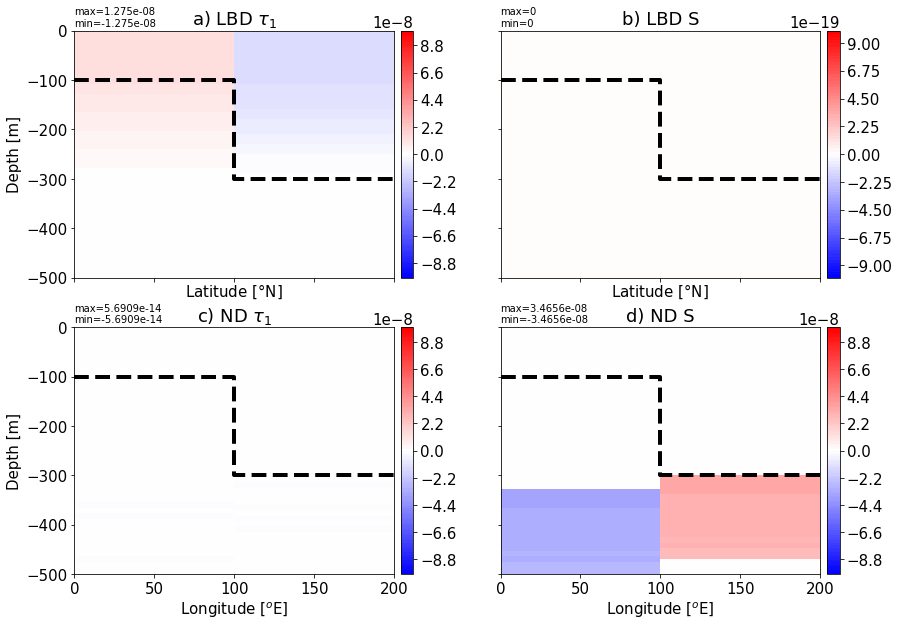

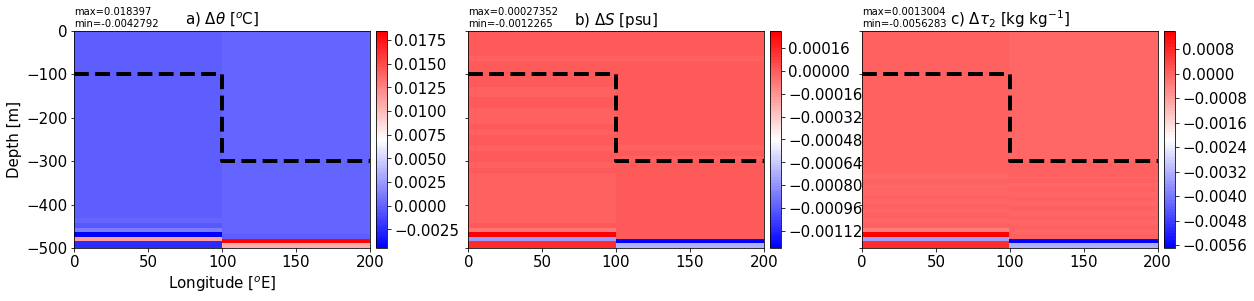

In [21]:
make_plot(case2_lbd_h,grd,IC_H,BLD_L=-100,BLD_R=-300)

(50, 2) (50, 2)


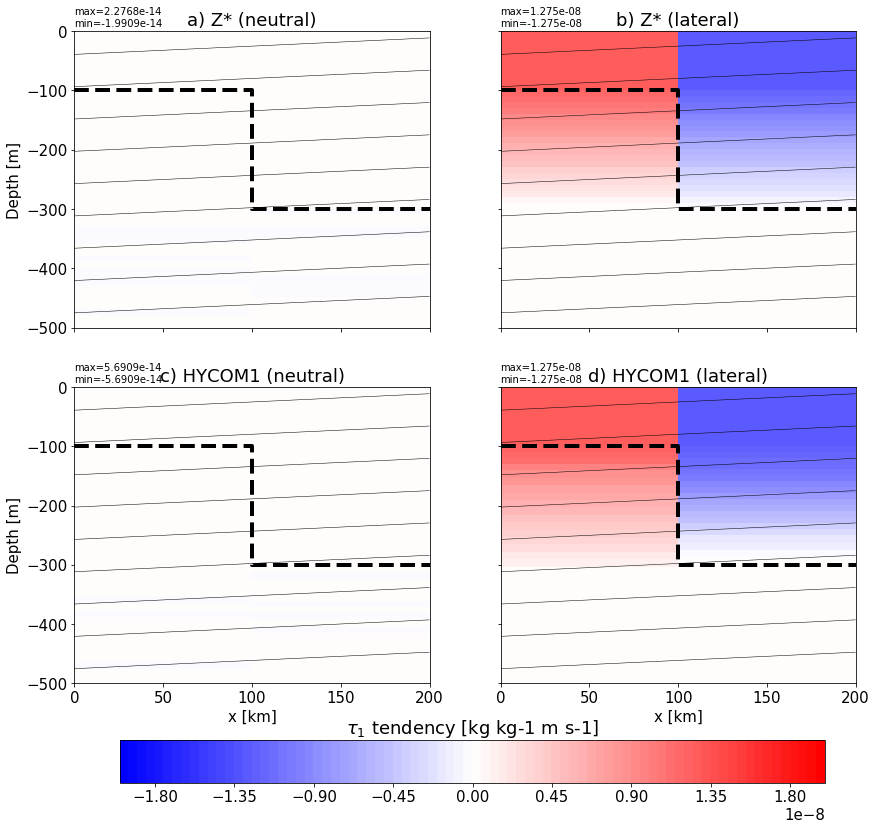

In [22]:
# tracer2
make_plot_all(case2_lbd_z,case2_lbd_h, grd,BLD_L=-100,BLD_R=-300, tr=r'$\tau_1$',
              clim=(-2e-8, 2e-8), fname='case2_tr2', units='[kg kg-1 m s-1]')

(50, 2) (50, 2)


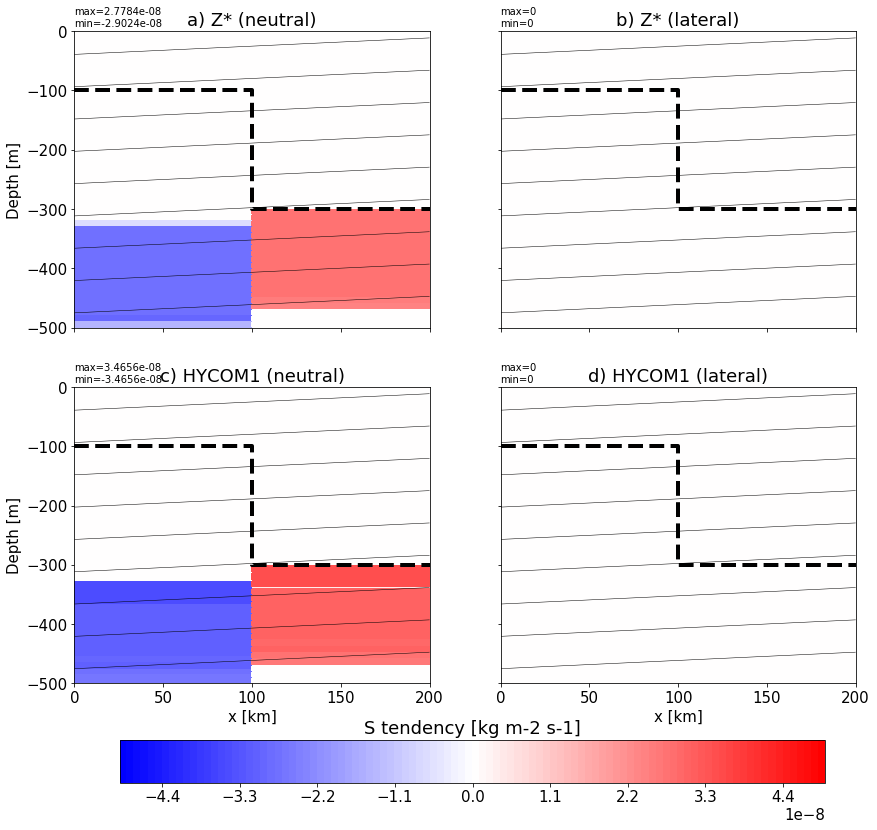

In [23]:
make_plot_all(case2_lbd_z,case2_lbd_h, grd,BLD_L=-100,BLD_R=-300, clim=(-5e-8, 5e-8), tr='S',
              var1='S_lbdxy_cont_tendency',var2='S_dfxy_cont_tendency', fname='case2_salt')